##### 5. Model Selection & Model Training

In [37]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [38]:
# load the data
df = pd.read_csv('data/seeds_dataset.csv')


In [39]:
#droping the unwanted columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [40]:
# separate the features and target variable
X = df.drop('Class (1, 2, 3)', axis=1)
y = df['Class (1, 2, 3)']

In [41]:
# Normalize and Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


# Print the normalized and scaled data
print("Normalized data: \n", X)


Normalized data: 
 [[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [42]:
# Split the dataset into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
models = [ LogisticRegression(solver='liblinear', penalty='l1', max_iter=100),
           GradientBoostingClassifier(n_estimators=100,random_state=5,learning_rate=0.1),
           SVC(kernel='rbf', C=2, gamma=1.0),
           BaggingClassifier(n_estimators=100,random_state=5),
           GaussianNB(),
           RandomForestClassifier(n_estimators=100, random_state=5,max_depth=5,criterion = 'entropy'),
           KNeighborsClassifier(n_neighbors=10),
           AdaBoostClassifier(n_estimators=100,random_state=5,),
           LGBMClassifier(n_estimators=100,random_state=5), 
           CatBoostClassifier(n_estimators=100,random_state=5),
           ExtraTreesClassifier(n_estimators=100,random_state=5)]

# Define a list of model names
model_names = ["LogisticRegression", "GaussianNB", "DecisionTree", "RandomForest", "GradientBoosting", "SVM",
               "KNN", "AdaBoost", "LightGBM", "CatBoost", "Bagging", "ExtraTrees"]

# Iterate over the models
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    

c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 0.6939646	total: 4.85ms	remaining: 480ms
1:	learn: 0.4774933	total: 12.8ms	remaining: 626ms
2:	learn: 0.3946588	total: 16.9ms	remaining: 548ms
3:	learn: 0.3319374	total: 22.3ms	remaining: 535ms
4:	learn: 0.2745760	total: 29.1ms	remaining: 554ms
5:	learn: 0.2434827	total: 32.6ms	remaining: 511ms
6:	learn: 0.2182787	total: 41ms	remaining: 544ms
7:	learn: 0.1998170	total: 47.1ms	remaining: 542ms
8:	learn: 0.1830054	total: 56ms	remaining: 567ms
9:	learn: 0.1644992	total: 62.3ms	remaining: 560ms
10:	learn: 0.1580069	total: 65.2ms	remaining: 527ms
11:	learn: 0.1482158	total: 74.1ms	remaining: 544ms
12:	learn: 0.1390966	total: 81ms	remaining: 542ms
13:	learn: 0.1328039	total: 92.6ms	remaining: 569ms
14:	learn: 0.1252399	total: 97.8ms	remaining: 554ms
15:	learn: 0.1155078	total: 107ms	remaining: 563ms
16:	learn: 0.1132030	total: 111ms	remaining: 544ms
17:	learn: 0.1046242	total: 116ms	remaining: 530ms
18:	learn: 0.0945958	total: 124ms	remaining: 527ms
19:	lea

In [43]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((168, 7), (42, 7))

In [44]:
results = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    result = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    results.append(result)

zip_file = zip(models, results)


for model, result in zip(models, results):
        y_pred = model.predict(X_test)
        np.seterr(divide='ignore', invalid='ignore')
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f'{model.__class__.__name__} - precision: {precision:.2f}, recall: {recall:.2f}, fscore: {fscore:.2f}')

LogisticRegression - precision: 0.98, recall: 0.98, fscore: 0.98
GradientBoostingClassifier - precision: 0.94, recall: 0.93, fscore: 0.93
SVC - precision: 0.91, recall: 0.90, fscore: 0.91
BaggingClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
GaussianNB - precision: 0.86, recall: 0.86, fscore: 0.86
RandomForestClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
KNeighborsClassifier - precision: 0.90, recall: 0.90, fscore: 0.90
AdaBoostClassifier - precision: 0.44, recall: 0.60, fscore: 0.48
LGBMClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
CatBoostClassifier - precision: 0.93, recall: 0.93, fscore: 0.93
ExtraTreesClassifier - precision: 0.88, recall: 0.88, fscore: 0.88


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.5
0:	learn: 0.6939646	total: 8.41ms	remaining: 833ms
1:	learn: 0.4774933	total: 14ms	remaining: 684ms
2:	learn: 0.3946588	total: 21.8ms	remaining: 705ms
3:	learn: 0.3319374	total: 26.7ms	remaining: 642ms
4:	learn: 0.2745760	total: 32.3ms	remaining: 613ms
5:	learn: 0.2434827	total: 41.3ms	remaining: 647ms
6:	learn: 0.2182787	total: 47.4ms	remaining: 630ms
7:	learn: 0.1998170	total: 56.2ms	remaining: 647ms
8:	learn: 0.1830054	total: 62ms	remaining: 627ms
9:	learn: 0.1644992	total: 70.4ms	remaining: 634ms
10:	learn: 0.1580069	total: 76.1ms	remaining: 616ms
11:	learn: 0.1482158	total: 88ms	remaining: 645ms
12:	learn: 0.1390966	total: 95.7ms	remaining: 641ms
13:	learn: 0.1328039	total: 105ms	remaining: 643ms
14:	learn: 0.1252399	total: 111ms	remaining: 626ms
15:	learn: 0.1155078	total: 119ms	remaining: 624ms
16:	learn: 0.1132030	total: 124ms	remaining: 607ms
17:	learn: 0.1046242	total: 134ms	remaining: 610ms
18:	learn: 0.0945958	total: 140ms	remaining: 597ms
19:	learn

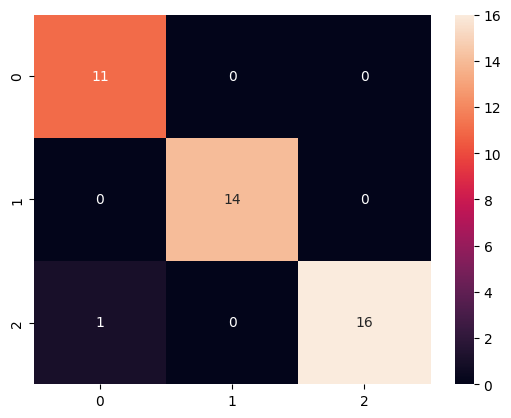

In [45]:
# Initialize variables to store precision and model name
highest_precision = 0
best_model_name = ''

# Iterate over the models
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    if precision > highest_precision:
        highest_precision = precision
        best_model_name = model_name
        best_model = model

# create a confusion matrix for the best model
cm = confusion_matrix(y_test, best_model.predict(X_test))
print(f'{best_model_name} - confusion matrix:')
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()


##### Difference between Actual and Predicted Values

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
30,1,1,0
172,3,3,0
84,2,2,0
199,3,1,2
60,1,3,-2
155,3,3,0
45,1,1,0
182,3,3,0
9,1,1,0
196,3,3,0


##### making a Predictive System


In [47]:
input_data=(14.99,14.56,0.8883,5.57,3.377,2.958,5.175)
input_data_as_numpy_array =np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
if(prediction==1):
    print('class 1')
elif(prediction==2):
    print('class 2')
else:
    print('class 3')      

class 1


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
